# 0.0 Entendendimento do Problema

-- Objetivo do problema:

    -- 1.0 Previsão do primeiro destino que o um novo usuário irá escolher.

    -- Porque?

        -- Qual o tipo do modelo de negócio do Airbnb?

            -- Marketplace (conectar oferta e demanda, e poder ganhar em cima dessa transação).

            -- Oferta (Pessoas oferecem acomodação)

                -- Tamanho do portifólio
                -- Diversidade/densidade de portifólio.
                -- Preço médio.

            -- Demanda (Pessoas procurando acomodação)

                -- Número de usuários
                -- LTV (Lifetime Value - Quanto que a pessoa vai gastar com a empresa)
                -- CAC (Client Acquisition Cost - Custo por cliente)

                Gross Revenue (Margem de lucro) = (fee * Número de usuário) - CAC
                **FEE => É a diferença entre o preço médio e o valor dado a pessoa que oferece a acomadação.**

-- Proposta da Solução:

    -- Modelo de predição do primeiro destino de um novo usuário. Tipo de entrega:

        -- 1.0. Salvar a predição em tabelas no banco de dados para ser acessada por meio de uma ferramenta de visualização.
        -- 2.0. Construção de API e acesso por meio dela:
        
            -- Input: Usuário coloca suas características.
            -- Output: Mostra as características do usuário e a **predição do destino**.

    -- Ciclos para proposta de solução: 16 Ciclos.

# OBSERVAÇÃO DO CICLO ANTERIOR:

 - Temos um problema em relação a métrica que será utilizada para mensurar a eficiência e eficácia do meu modelo.
 

## Exemplos de métricas para problemas de classificação

- **Acurácia:** Número de predições corretas (soma de todos os números na diagonal principal) sobre o número de todas as predições realizadas pelo modelo. A acurácia é enviesada pela classe que tem mais exemplos. (VP / VP+FP+FN+VN)


- **Precisão:** Contar quantas predições foram corretas e dividir por todas as predições realizadas pelo modelo em cada classe. Assim podemo entender o quanto que o modelo está acertando para uma classe específica. Essa métrica pode ser utilizada quando a regra de exige que tenhamos prioridade em analisar uma classe específica. (VP / VP + FN)


- **Recall (Sensibility):** Contar quantas predições foram corretas e dividir por todos os exemplos reais de cada classe. (VP / VP + FP) Ex: De todos as predições que ocorrem em determinada classe, deseja-se mensurar o aparecimento de um exemplo real.


- O precision e o Recall podem formar a curva roc. A curva Roc é chamada de curva de operação, no qual pode definir o trade holshing para mensurar o ponto ideal de classificar as classes de acordo com esse trade.


- **F1 Score:** Resumo da precision e Recall, média harmônica. (2* precision FR * Recall FR / (Precision FR + Recall FR) )
Para o time de negócio pode ser chamada de acurácia.


- **Balanced Accuracy:** Média das acurácias de cada classe. Ex: (pred corretas classe A/Total pred classe A + pred corretas classe B/Total pred classe B +...+ pred corretas classe N/Total pred classe N) Total de classes

Mesmo com classe desbalanceada, essa métrica consegue monitorar a performance. Significa a acurácia real do modelo.


- **Kappa Score:** Medir o nível de acordo entre dois avaliadores. Ex: (#Nível de Acordo - (#Nível Acordo ao acaso))/(1 - #Nível de Acordo ao acaso)

Essa métrica estima o quão melhor é dois estimadores caso fossem avaliado o nível de acordo ao acaso. Ou seja, define se o modelo vai ser melhor caso fosse feito de aleatório. O Kappa Score pode comparar a performance de dois modelos diferentes.




### Escolha das métricas

- Poderá ser escolhido o balanced Accuracy e o Kappa Score

# Ciclo 02 <font color = 'red'> - Imbalanced Metrics </font>

## 0.0 Imports

In [27]:
import pandas   as pd
import numpy    as np
import random

from sklearn import model_selection as ms
from sklearn import preprocessing   as pp
from sklearn import metrics         as m
from scikitplot import metrics      as mt

from keras import models   as ml
from keras import layers   as l


### 0.1. Helper Functions

### 0.2. Loading Data

In [4]:
a = r'D:\CDS\Projetos\PA01\airbnb_predict\Source\train_users_2.csv'
df_raw = pd.read_csv(a, low_memory=False)
df_raw.shape

(213451, 16)

In [5]:
#b = r'D:\CDS\Projetos\PA01\airbnb_predict\Source\sessions.csv'
#df_sessions = pd.read_csv(b,low_memory=True)
#df_sessions.shape

In [6]:
#df_sessions.sample(2)

## 1.0. Data Description

In [7]:
df1 = df_raw.copy()

In [8]:
print('Number of rows: {}'.format(df1.shape[0]))
print('Number of collumns: {}'.format(df1.shape[1]))

Number of rows: 213451
Number of collumns: 16


In [9]:
df1.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


### 1.1 Data type:

In [10]:
df1.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

Obs: A coluna date_account_created tem que ser Datetime.

### 1.2 NA check:

In [11]:
df1.isna().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [12]:
# Remove missing values
df1 = df1.dropna()
df1.shape

(68171, 16)

### 1.3 Change Data Type:

In [13]:
df1.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

In [14]:
df1.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US


In [15]:
# date_account_created
df1['date_account_created'] = pd.to_datetime(df1['date_account_created'])
# timestamp_first_active
df1['timestamp_first_active'] = pd.to_datetime(df1['timestamp_first_active'], format='%Y%m%d%H%M%S')

# date_first_booking
df1['date_first_booking'] = pd.to_datetime(df1['date_first_booking'])
# age
df1['age']=df1['age'].astype(np.int64)

In [16]:
df1.dtypes

id                                 object
date_account_created       datetime64[ns]
timestamp_first_active     datetime64[ns]
date_first_booking         datetime64[ns]
gender                             object
age                                 int64
signup_method                      object
signup_flow                         int64
language                           object
affiliate_channel                  object
affiliate_provider                 object
first_affiliate_tracked            object
signup_app                         object
first_device_type                  object
first_browser                      object
country_destination                object
dtype: object

### 1.4 Check balanced data:

In [17]:
# Observando o balanceamento da variável resposta
df1['country_destination'].value_counts(normalize=True)

# Obs: Ao excluir as linhas vazias, foi excluído todo uma classe. (NDF = na)

US       0.708864
other    0.110854
FR       0.054085
IT       0.029763
GB       0.025935
ES       0.024864
CA       0.015696
DE       0.012454
NL       0.008801
AU       0.006366
PT       0.002318
Name: country_destination, dtype: float64

In [18]:
df = df1.copy()

## 2.0. Data Filtering

### 2.1. Filteringo rows

### 2.2. Columns selection

## 3.0 Data Preparation

In [19]:
cols_categoric = ['gender',
                'signup_method',
                'language',
                'affiliate_channel',
                'affiliate_provider',
                'first_affiliate_tracked',
                'signup_app',
                'first_device_type',
                'first_browser']
# dummy variable
df_dummy = pd.get_dummies( df.drop( ['id','country_destination'], axis=1 ) ) # Retirando as variáveis do ID e a variável resposta (target)

#join id and country destination 
df = pd.concat( [df[['id','country_destination']],df_dummy], axis=1 )

In [20]:
df.head()

,id,country_destination,date_account_created,timestamp_first_active,date_first_booking,age,signup_flow,gender_-unknown-,gender_FEMALE,gender_MALE,...,first_browser_Safari,first_browser_SeaMonkey,first_browser_Silk,first_browser_SiteKiosk,first_browser_SlimBrowser,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_Yandex.Browser
2,4ft3gnwmtx,US,2010-09-28,2009-06-09 23:12:47,2010-08-02,56,3,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,bjjt8pjhuk,other,2011-12-05,2009-10-31 06:01:29,2012-09-08,42,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,87mebub9p4,US,2010-09-14,2009-12-08 06:11:05,2010-02-18,41,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,lsw9q7uk0j,US,2010-01-02,2010-01-02 01:25:58,2010-01-05,46,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
7,0d01nltbrs,US,2010-01-03,2010-01-03 19:19:05,2010-01-13,47,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


## 4.0. Feature Selection

In [21]:
df.sample().T

,144975
id,l1vj9svss6
country_destination,other
date_account_created,2014-01-23 00:00:00
timestamp_first_active,2014-01-23 01:24:02
date_first_booking,2014-01-23 00:00:00
...,...
first_browser_Sogou Explorer,0
first_browser_Stainless,0
first_browser_TenFourFox,0
first_browser_TheWorld Browser,0


In [22]:
cols_drop = ['id','date_account_created','timestamp_first_active','date_first_booking'] # Original Dates
df=df.drop(cols_drop,axis=1)
#df.dtypes

In [23]:
X = df.drop('country_destination', axis=1)
y = df['country_destination'].copy()

In [24]:
X

,age,signup_flow,gender_-unknown-,gender_FEMALE,gender_MALE,gender_OTHER,signup_method_basic,signup_method_facebook,signup_method_google,language_ca,...,first_browser_Safari,first_browser_SeaMonkey,first_browser_Silk,first_browser_SiteKiosk,first_browser_SlimBrowser,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_Yandex.Browser
2,56,3,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,42,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,41,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,46,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,47,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213415,55,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
213439,43,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
213441,34,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
213443,36,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


## 5.0. Machine Learning Model 

In [33]:
# Split Dataset into training and test
x_train, x_test, y_train, y_test = ms.train_test_split(
                                                        X,
                                                        y,
                                                        test_size = 0.25,
                                                        random_state=42
                                                        )

### 5.1. Baseline Model
- Inserindo um modelo que realizar a classifição da amostragem de forma aleatória, com os devidos pesos.


In [63]:
country_destination_weights = df1['country_destination'].value_counts(normalize = True).sort_index().tolist()

In [64]:
k_num = y_test.shape[0]

In [65]:
country_destination_list = df1['country_destination'].drop_duplicates().sort_values().tolist()

In [66]:
# Modelo que faz a aleatoriazação da target
yhat_random = random.choices(
                            population = country_destination_list,
                            weights = country_destination_weights,
                            k= k_num )
len(yhat_random)

17043

### 5.2. Neural Network - MLP

In [26]:
#y_train.values # Tem que transformar em valores numéricos. Utiliza-se o One Hot Encoding

In [27]:
#y_train.values.reshape(-1,1)

In [54]:
ohe = pp.OneHotEncoder()
y_ohe = y_train.values.reshape(-1,1)
y_train_nn = ohe.fit_transform(y_ohe).toarray()

In [55]:
#y_train_nn.shape

In [56]:
# Model definition
model = ml.Sequential()
model.add( l.Dense (
                100,
                input_dim =x_train.shape[1],
                activation = 'relu' 
                ) ) # Irá adicionar as Layers da rede neural .. Camada de entrada

model.add( l.Dense (
                    11, #11 por causa do número de saídas
                    activation = 'softmax' 
                    )
                    )

# Model compile
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

# train model
model.fit(x_train, y_train_nn, epochs=100)

Epoch 1/100
1598/1598 [==============================] - 4s 1ms/step - loss: 1.3154 - accuracy: 0.7062: 0s - loss: 1.3284 - ac
Epoch 2/100
1598/1598 [==============================] - 2s 1ms/step - loss: 1.2720 - accuracy: 0.7065
Epoch 3/100
1598/1598 [==============================] - 2s 1ms/step - loss: 1.2538 - accuracy: 0.7065
Epoch 4/100
1598/1598 [==============================] - 2s 1ms/step - loss: 1.2300 - accuracy: 0.7067
Epoch 5/100
1598/1598 [==============================] - 2s 1ms/step - loss: 1.2123 - accuracy: 0.7069
Epoch 6/100
1598/1598 [==============================] - 2s 1ms/step - loss: 1.2055 - accuracy: 0.7067
Epoch 7/100
1598/1598 [==============================] - 2s 1ms/step - loss: 1.1845 - accuracy: 0.7071
Epoch 8/100
1598/1598 [==============================] - 2s 1ms/step - loss: 1.1765 - accuracy: 0.7070
Epoch 9/100
1598/1598 [==============================] - 2s 1ms/step - loss: 1.1665 - accuracy: 0.7070
Epoch 10/100
1598/1598 [=========================

1598/1598 [==============================] - 2s 1ms/step - loss: 1.1069 - accuracy: 0.7095: 0s - loss: 1.1090 - accura
Epoch 80/100
1598/1598 [==============================] - 2s 1ms/step - loss: 1.1065 - accuracy: 0.7095
Epoch 81/100
1598/1598 [==============================] - 2s 1ms/step - loss: 1.1065 - accuracy: 0.7095
Epoch 82/100
1598/1598 [==============================] - 2s 1ms/step - loss: 1.1065 - accuracy: 0.7093: 0s - l
Epoch 83/100
1598/1598 [==============================] - 2s 1ms/step - loss: 1.1060 - accuracy: 0.7095
Epoch 84/100
1598/1598 [==============================] - 2s 1ms/step - loss: 1.1059 - accuracy: 0.7095
Epoch 85/100
1598/1598 [==============================] - 2s 1ms/step - loss: 1.1060 - accuracy: 0.7095
Epoch 86/100
1598/1598 [==============================] - 2s 1ms/step - loss: 1.1055 - accuracy: 0.7097
Epoch 87/100
1598/1598 [==============================] - 2s 1ms/step - loss: 1.1054 - accuracy: 0.7097
Epoch 88/100
1598/1598 [=================

## 6.0. Performance

### 6.1. NN - Performance

In [57]:
# prediction 
pred_nn = model.predict( x_test )

In [58]:
# Invert prediction
yhat_nn = ohe.inverse_transform( pred_nn )

In [59]:


# Prediction prepare
y_test_nn = y_test.to_numpy()
yhat_nn = yhat_nn.reshape(1 , -1 )[0]

In [60]:
yhat_nn

array(['US', 'US', 'US', ..., 'US', 'US', 'US'], dtype=object)

Accuracy: 0.7095581763773984
Balanced Accuracy: 0.0912348688235274
Kappa Score: 0.001872325349855486


D:\CDS\Projetos\PA01\airbnb_predict\airbnb\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\CDS\Projetos\PA01\airbnb_predict\airbnb\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\CDS\Projetos\PA01\airbnb_predict\airbnb\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          AU       0.00      0.00      0.00       110
          CA       0.00      0.00      0.00       272
          DE       0.00      0.00      0.00       218
          ES       0.00      0.00      0.00       436
          FR       0.00      0.00      0.00       917
          GB       0.20      0.00      0.00       439
          IT       0.00      0.00      0.00       503
          NL       0.00      0.00      0.00       130
          PT       0.00      0.00      0.00        37
          US       0.71      1.00      0.83     12126
       other       0.21      0.00      0.01      1855

    accuracy                           0.71     17043
   macro avg       0.10      0.09      0.08     17043
weighted avg       0.53      0.71      0.59     17043



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

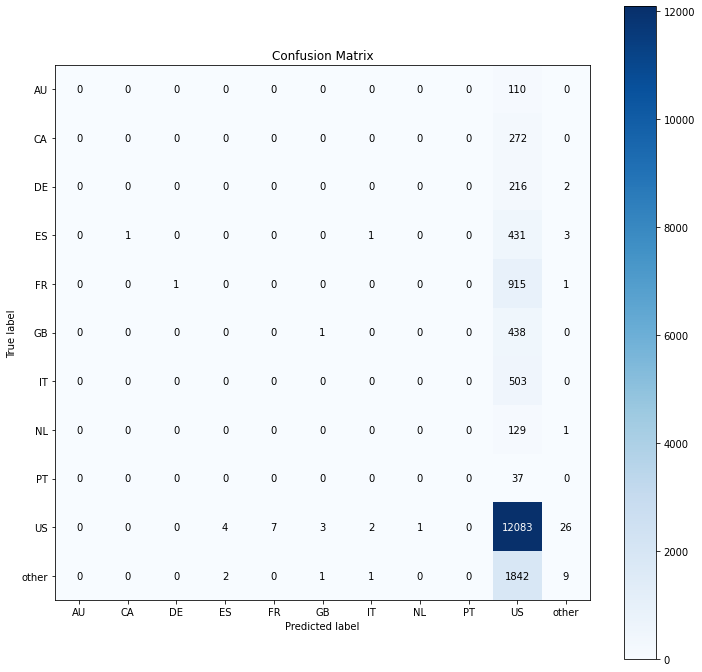

In [61]:
# Accuracy
acc_nn = m.accuracy_score( 
                y_test_nn, 
                yhat_nn
                )
print('Accuracy: {}'.format(acc_nn))
# Balanced accury Score

b_acc_nn = m.balanced_accuracy_score(
                        y_test_nn,
                        yhat_nn
                            )
print('Balanced Accuracy: {}'.format(b_acc_nn))

# Kappa Metrics
kappa_nn = m.cohen_kappa_score(
                            y_test_nn,
                            yhat_nn
                                )
print('Kappa Score: {}'.format(kappa_nn))

# Classification report
print(m.classification_report(y_test_nn, yhat_nn))


# Confusion Matrix
mt.plot_confusion_matrix(
                        y_test_nn,
                        yhat_nn, 
                        normalize=False, 
                        figsize=(12,12)
                        )

 O weighted avg é a média ponderada das métricas logo acima.

### 6.2. Baseline Model - Performance

Accuracy: 0.519157425335915
Balanced Accuracy: 0.0879957188760669
Kappa Score: -0.0031189417029893196
              precision    recall  f1-score   support

          AU       0.00      0.00      0.00       110
          CA       0.01      0.01      0.01       272
          DE       0.01      0.00      0.00       218
          ES       0.03      0.03      0.03       436
          FR       0.05      0.05      0.05       917
          GB       0.02      0.02      0.02       439
          IT       0.03      0.03      0.03       503
          NL       0.00      0.00      0.00       130
          PT       0.00      0.00      0.00        37
          US       0.71      0.70      0.71     12126
       other       0.11      0.11      0.11      1855

    accuracy                           0.52     17043
   macro avg       0.09      0.09      0.09     17043
weighted avg       0.52      0.52      0.52     17043



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

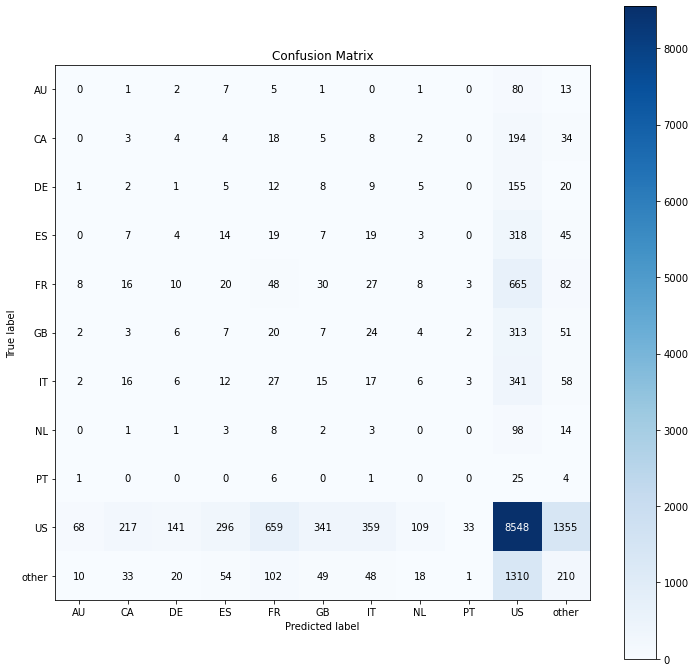

In [67]:
# Accuracy
acc_random = m.accuracy_score( 
                y_test_nn, 
                yhat_random
                )
print('Accuracy: {}'.format(acc_random))
# Balanced accury Score

b_acc_random = m.balanced_accuracy_score(
                        y_test_nn,
                        yhat_random
                            )
print('Balanced Accuracy: {}'.format(b_acc_random))

# Kappa Metrics
kappa_random = m.cohen_kappa_score(
                            y_test_nn,
                            yhat_random
                                )
print('Kappa Score: {}'.format(kappa_random))

# Classification report
print(m.classification_report(y_test_nn, yhat_random))


# Confusion Matrix
mt.plot_confusion_matrix(
                        y_test_nn,
                        yhat_random, 
                        normalize=False, 
                        figsize=(12,12)
                        )